<a href="https://colab.research.google.com/github/tahamsi/github-upload/blob/main/FaceDetectionClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Face detection and comparison
# Taha Mansouri
# You'd better install these packages on your propriarity server
! pip install git+https://github.com/rcmalli/keras-vggface.git
! pip install keras_applications --no-deps
! pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-n5h9_hyg
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-n5h9_hyg
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=3a30af7877af3e89cda6cdc5d866b2202755e1439bc93e8f6892b3f30c6dee34
  Stored in directory: /tmp/pip-ephem-wheel-cache-97w3t3ff/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.4 MB/s 


In [ ]:
import tensorflow as tf
'''
Open .../dist-packages/keras_vggface/models.py and replace
from keras.engine.topology import get_source_inputs
with
from keras.utils.layer_utils import get_source_inputs
'''
from keras_vggface.vggface import VGGFace
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# face verification with the VGGFace2 model
from scipy.spatial.distance import cosine
from keras_vggface.utils import preprocess_input
from skimage import color
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
class Face:
  def __init__(self, model_type, pooling_type):
    self.detector = MTCNN()
    self.model = VGGFace(model = model_type, include_top=False, input_shape=(224, 224, 3), pooling = pooling_type)

  def extract_face(self, filename, required_size=(224, 224)):
  # you need to specify the size, it is 224 by 224 by default.
  # This function accepts a filename (you can change it with an opened file), 
  # a detector which is an already trained neural network and returns a list of embedings
  # the size of the list shows the number of detected faces.
    pixels = pyplot.imread(filename)
    results = self.detector.detect_faces(pixels)
    if len(results)==0:
        return 0
    res = []
    for result in results:
        x1, y1, width, height = result['box']
        x2, y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face.copy())
        image = image.resize(required_size)
        face_array = asarray(image)
        res.append(face_array)
    return res
  
  def look_for_faces(self, file_name, show=True):
    # this would be one api for face detection. However, we should wrap them
    # in a class.
    pixels = self.extract_face(file_name)
    if pixels ==0:
      print("No face has been detected!")
    else:
      if show:
        for pixel in pixels:
          pyplot.imshow(pixel)
          pyplot.show()
      else:
        print(len(pixels), "faces have been detected!")
    
    # extract faces and calculate face embeddings for a list of photo files
  def get_embeddings(self,filenames):
    
    faces = self.extract_face(filenames)

    if len(faces)==0:
      return 0
    samples = asarray(faces, 'float32')
    samples = preprocess_input(samples, version=2) # version = 1: VGGFace1
    yhat = self.model.predict(samples)
    return yhat

  # determine if a candidate face is a match for a known face
  def is_match(self,known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
      print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
      print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [ ]:
#’vgg16′ (the default), and two VGGFace2 models ‘resnet50‘ and ‘senet50‘.
face = Face("resnet50", "avg")

94694792/94694792 [==============================] - 1s 0us/step


4/4 [==============================] - 0s 37ms/step


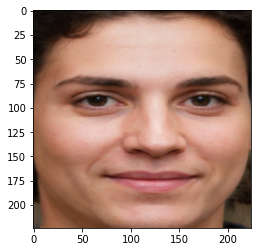

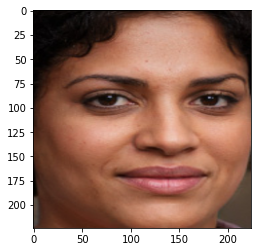

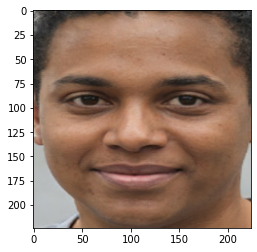

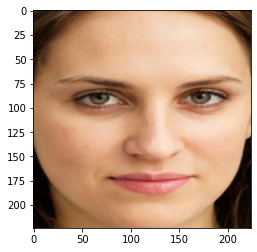

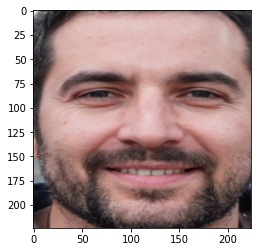

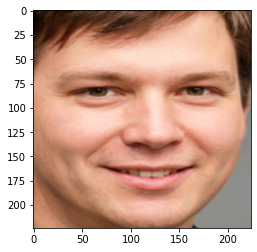

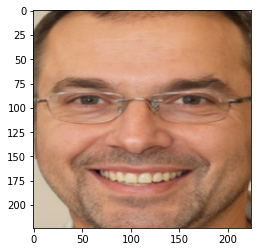

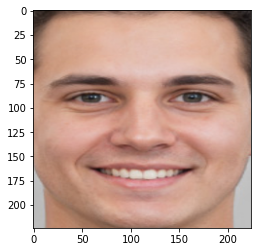

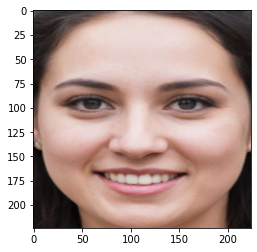

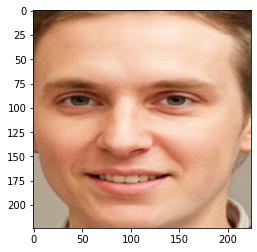

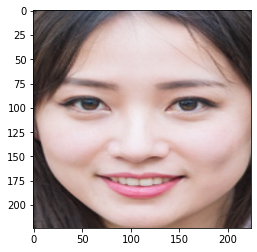

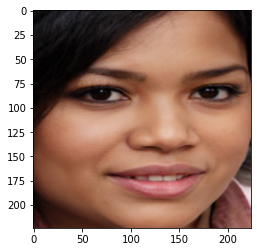

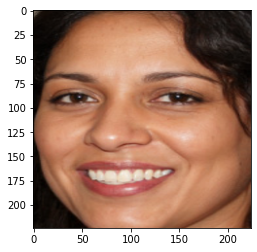

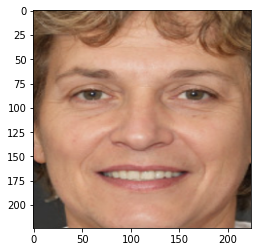

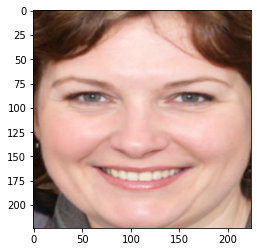

In [ ]:
face.look_for_faces("Test.jpg")

In [ ]:
embeddings = face.get_embeddings('Test.jpg')

1/1 [==============================] - 3s 3s/step


In [ ]:
for embd in embeddings:
  face.is_match(embd, embeddings[2],0.4)

>face is NOT a Match (0.573 > 0.400)
>face is NOT a Match (0.477 > 0.400)
>face is a Match (0.000 <= 0.400)
>face is NOT a Match (0.621 > 0.400)
>face is NOT a Match (0.734 > 0.400)
>face is NOT a Match (0.619 > 0.400)
>face is NOT a Match (0.696 > 0.400)
>face is NOT a Match (0.502 > 0.400)
>face is NOT a Match (0.620 > 0.400)
>face is NOT a Match (0.648 > 0.400)
>face is NOT a Match (0.705 > 0.400)
>face is NOT a Match (0.542 > 0.400)
>face is NOT a Match (0.429 > 0.400)
>face is NOT a Match (0.575 > 0.400)
>face is NOT a Match (0.713 > 0.400)
